Projekt na bazie danych https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Zadanie polega na przewidzeniu czy następnego dnia w Australii będzie padał deszcz.

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.neural_network import MLPRegressor, MLPClassifier
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend
from keras.callbacks import History
from keras import callbacks
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Opis kolumn

| Column Name | Description |
| :-: | :-: |
| Date | The date of observation |
| Location | The common name of the location of the weather station| 
| MinTemp |  The minimum temperature in degrees celsius | 
| MaxTemp |  The maximum temperature in degrees celsius| 
| Rainfall |  The amount of rainfall recorded for the day in mm| 
| Evaporation |  The so-called Class A pan evaporation (mm) in the 24 hours to 9am| 
| Sunshine |  The number of hours of bright sunshine in the day| 
| WindGustDir |  The direction of the strongest wind gust in the 24 hours to midnight| 
| WindGustSpeed |  The speed (km/h) of the strongest wind gust in the 24 hours to midnight| 
| WindDir9am |  Direction of the wind at 9am| 
| WindDir3pm |  Direction of the wind at 3pm| 
| WindSpeed9am |  Wind speed (km/hr) averaged over 10 minutes prior to 9am| 
| WindSpeed3pm |  Wind speed (km/hr) averaged over 10 minutes prior to 3pm| 
| Humidity9am |  Humidity (percent) at 9am| 
| Humidity3pm |  Humidity (percent) at 3pm| 
| Pressure9am |  Atmospheric pressure (hpa) reduced to mean sea level at 9am| 
| Pressure3pm | Atmospheric pressure (hpa) reduced to mean sea level at 3pm| 
| Cloud9am |  Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast| 
| Cloud3pm |  Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values| 
| Temp9am |  Temperature (degrees C) at 9am| 
| Temp3pm |  Temperature (degrees C) at 3pm| 
| RainToday |  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0| 

# Pobranie i wyfiltrowanie danych

In [4]:
data = pd.read_csv('weatherAUS.csv')

start_date = "2015-01-01"
end_date = "2015-01-31"

data['Date']= pd.to_datetime(data["Date"])
data = data.loc[(data["Date"] >= start_date) & (data["Date"] <= end_date)]
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No


# Przetwarzanie danych

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 2133 to 144583
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1519 non-null   datetime64[ns]
 1   Location       1519 non-null   object        
 2   MinTemp        1492 non-null   float64       
 3   MaxTemp        1492 non-null   float64       
 4   Rainfall       1444 non-null   float64       
 5   Evaporation    779 non-null    float64       
 6   Sunshine       717 non-null    float64       
 7   WindGustDir    1404 non-null   object        
 8   WindGustSpeed  1404 non-null   float64       
 9   WindDir9am     1436 non-null   object        
 10  WindDir3pm     1476 non-null   object        
 11  WindSpeed9am   1482 non-null   float64       
 12  WindSpeed3pm   1481 non-null   float64       
 13  Humidity9am    1492 non-null   float64       
 14  Humidity3pm    1488 non-null   float64       
 15  Pressure9am    1

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

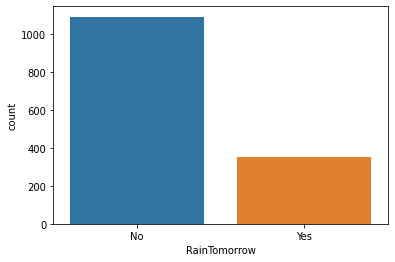

In [412]:
sns.countplot(x= data["RainTomorrow"])

In [413]:
len(data[data.RainTomorrow == 'No'])/len(data[data.RainTomorrow == 'Yes'])

3.090651558073654

Jak można zauważyć z powyższego diagramu przeważnie następnego dnia nie ma deszczu.

### Wartości numeryczne

Wypisuję wszystkie kolumny z wartościami numerycznymi.

In [414]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Sprawdzam ile jest brakujących wartości w poszczególnych kolumnach.

In [415]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 27
MaxTemp 27
Rainfall 75
Evaporation 740
Sunshine 802
WindGustSpeed 115
WindSpeed9am 37
WindSpeed3pm 38
Humidity9am 27
Humidity3pm 31
Pressure9am 211
Pressure3pm 212
Cloud9am 624
Cloud3pm 615
Temp9am 27
Temp3pm 31


Sprawdzimy sobię teraz w których kolumnach jest najwięcej brakujących wartości

In [416]:
data_num = (data[num_cols])
total_num = data_num.isnull().sum().sort_values(ascending=False)
percent_num = (data_num.isnull().sum()/data_num.isnull().count()).sort_values(ascending=False)
missing_num = pd.concat([total_num, percent_num], axis=1, keys=['Total', 'Percent'])
missing_num

,Total,Percent
Sunshine,802,0.527979
Evaporation,740,0.487163
Cloud9am,624,0.410797
Cloud3pm,615,0.404872
Pressure3pm,212,0.139566
Pressure9am,211,0.138907
WindGustSpeed,115,0.075708
Rainfall,75,0.049375
WindSpeed3pm,38,0.025016
WindSpeed9am,37,0.024358


Widzimy że kolumny Sunshine, Evaporation, Cloud3pm oraz Cloud9am mają największą liczbę brakujących danych. Po analizie danych zauważyłem że w poszczególnych lokalizacjach najprawdopodobniej brakuje odpowiednich przyrządów pomiarowych lub pomiary nie zostały wykonane. Zamiast pominięcia tych wartości 4 kolumn postanowiłem uzupełnić je średnią przypadającą na dany dzień.

In [417]:
mean_values = data.groupby(data["Date"]).mean().reset_index(drop=False)
mean_values.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-01-01,16.591667,30.795918,4.762500,8.312000,9.859091,38.847826,13.468085,16.617021,60.208333,42.562500,1012.637209,1010.276744,4.607143,4.037037,22.933333,29.008333
1,2015-01-02,18.242857,33.177551,1.353191,7.973913,9.222727,43.288889,14.250000,19.804348,59.918367,41.645833,1013.765116,1011.393023,5.178571,4.888889,24.797959,31.054167
2,2015-01-03,19.716327,33.397959,0.736170,11.226087,8.513636,49.288889,16.510638,24.255319,54.714286,39.979167,1014.200000,1011.060465,4.333333,4.840000,26.416327,31.220833
3,2015-01-04,18.655102,30.075510,5.817021,10.427273,8.922727,45.222222,16.319149,18.042553,64.367347,47.183673,1014.976744,1012.702326,4.769231,4.250000,23.114286,28.055102
4,2015-01-05,18.187755,29.720408,2.929167,12.707692,8.220833,41.066667,16.416667,18.520833,64.755102,52.653061,1015.804651,1013.990698,5.677419,5.379310,23.002041,27.722449


In [391]:
date_range = pd.date_range(start_date, end_date)
i = 0
for day in date_range:
    day = day.strftime("%Y-%m-%d")
    data.loc[data['Date'] == day, 'Sunshine'] = data.loc[data['Date'] == day, 'Sunshine'].fillna(mean_values.loc[mean_values['Date'] == day]['Sunshine'][i])
    data.loc[data['Date'] == day, 'Evaporation'] = data.loc[data['Date'] == day, 'Evaporation'].fillna(mean_values.loc[mean_values['Date'] == day]['Evaporation'][i])
    data.loc[data['Date'] == day, 'Cloud3pm'] = data.loc[data['Date'] == day, 'Cloud3pm'].fillna(mean_values.loc[mean_values['Date'] == day]['Cloud3pm'][i])
    data.loc[data['Date'] == day, 'Cloud9am'] = data.loc[data['Date'] == day, 'Cloud9am'].fillna(mean_values.loc[mean_values['Date'] == day]['Cloud9am'][i])
    i = i+1

W pozostałych kolumnach uzupełniam brakujące wartości medianą

In [418]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

Sprawdzamy czy jeszcze jakieś wartości są nieuzupełnione

In [419]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0


### Wartości kategoryczne

In [420]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)

data_obj = (data[object_cols])
data_obj.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
2133,Albury,WSW,ESE,W,No,No
2134,Albury,NE,ESE,ESE,No,No
2135,Albury,NNE,NE,N,No,No
2136,Albury,NNE,ESE,W,No,No
2137,Albury,E,SSE,SE,No,No


In [421]:
print("Wartosci kategoryczne:")
print(object_cols)

Wartosci kategoryczne:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Sprawdzamy brakujące wartości

In [422]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 115
WindDir9am 83
WindDir3pm 43
RainToday 75
RainTomorrow 75


In [423]:
total_obj = data_obj.isnull().sum().sort_values(ascending=False)
percent_obj = (data_obj.isnull().sum()/data_obj.isnull().count()).sort_values(ascending=False)
missing_obj = pd.concat([total_obj, percent_obj], axis=1, keys=['Total', 'Percent'])
missing_obj

,Total,Percent
WindGustDir,115,0.075708
WindDir9am,83,0.054641
RainToday,75,0.049375
RainTomorrow,75,0.049375
WindDir3pm,43,0.028308
Location,0,0.000000


Zauważamy, że pojawiają się wiersze z niewiadomym rezultatem(RainTomorrow). Z racji tego że nie jesteśmy w stanie przewidzieć czy następnego dnia był deszcz czy nie usuwam te wiersze.

In [425]:
data.dropna(subset = ["RainTomorrow"], inplace=True)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,7.6,10.2,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,6.0,6.0,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,7.6,10.2,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,6.0,6.0,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,7.6,10.2,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,6.0,6.0,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,7.6,10.2,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,7.6,10.2,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,6.0,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144579,2015-01-27,Uluru,23.8,33.0,0.0,7.6,10.2,NE,43.0,E,...,19.0,21.0,1010.2,1007.1,3.0,8.0,28.4,31.4,No,No
144580,2015-01-28,Uluru,19.2,35.4,0.0,7.6,10.2,E,46.0,E,...,22.0,11.0,1009.7,1005.9,6.0,6.0,27.2,34.0,No,No
144581,2015-01-29,Uluru,15.5,35.5,0.0,7.6,10.2,E,44.0,ENE,...,21.0,9.0,1010.0,1006.6,6.0,6.0,26.8,34.1,No,No
144582,2015-01-30,Uluru,14.4,37.9,0.0,7.6,10.2,SSE,48.0,ENE,...,17.0,8.0,1009.7,1005.6,6.0,6.0,28.7,36.5,No,No


Jeszcze raz sprawdzam brakujące wartości.

In [428]:
data_obj = (data[object_cols])
total_obj = data_obj.isnull().sum().sort_values(ascending=False)
percent_obj = (data_obj.isnull().sum()/data_obj.isnull().count()).sort_values(ascending=False)
missing_obj = pd.concat([total_obj, percent_obj], axis=1, keys=['Total', 'Percent'])

Zauważamy że wraz z usunięciem wierszy z brakującym RainTomorrow zostały również zredukowane wystąpienia RainToday. Z racji na niski procent wystąpienia pozostałych wartości kategorycznych uzupełniam je wartościami najczęściej pojawiającymi się w zbiorze danych.

In [429]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [430]:
for i in data.columns:
    print(i, data[i].isnull().sum())

Date 0
Location 0
MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustDir 0
WindGustSpeed 0
WindDir9am 0
WindDir3pm 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
RainToday 0
RainTomorrow 0


Jak widzimy pomyślnie usunęliśmy wszystkie brakujące wartości. Teraz przekształcamy wartości kategoryczne na numeryczne.

In [431]:
for col in object_cols:
    print("\n************", col, "***********\n", data[col].value_counts(), "\n\n")


************ Location ***********
 Albury              31
Bendigo             31
AliceSprings        31
SalmonGums          31
NorfolkIsland       31
SydneyAirport       31
Nhil                31
Cobar               31
Darwin              31
Richmond            31
MountGambier        31
Sydney              31
Woomera             31
MountGinini         31
Uluru               31
Adelaide            31
Newcastle           31
PearceRAAF          31
Launceston          31
Nuriootpa           31
Townsville          31
Portland            31
Sale                31
Wollongong          31
Watsonia            31
Ballarat            31
Katherine           31
Albany              31
Penrith             31
WaggaWagga          31
MelbourneAirport    31
Dartmoor            31
Tuggeranong         31
PerthAirport        31
Canberra            31
Cairns              31
NorahHead           31
Perth               31
BadgerysCreek       30
Hobart              30
Mildura             30
Witchcliffe         3

Zauważamy że: 
- RainTomorrow i RainToday przyjmują wartości logiczne
- WindGustDir, WindDir9am, WindDir3pm przyjmują jedną z wartości SE, S, W, SSE, SW, WSW, ESE, E, SSW, ENE, N, NE, WNW, NNW, NW, NNE
- Location przyjmuje sporo wartości

Do transformacji kolumny Location użyję LabelEncoder'a

In [432]:
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 2133 to 144583
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1444 non-null   datetime64[ns]
 1   Location       1444 non-null   int64         
 2   MinTemp        1444 non-null   float64       
 3   MaxTemp        1444 non-null   float64       
 4   Rainfall       1444 non-null   float64       
 5   Evaporation    1444 non-null   float64       
 6   Sunshine       1444 non-null   float64       
 7   WindGustDir    1444 non-null   int64         
 8   WindGustSpeed  1444 non-null   float64       
 9   WindDir9am     1444 non-null   int64         
 10  WindDir3pm     1444 non-null   int64         
 11  WindSpeed9am   1444 non-null   float64       
 12  WindSpeed3pm   1444 non-null   float64       
 13  Humidity9am    1444 non-null   float64       
 14  Humidity3pm    1444 non-null   float64       
 15  Pressure9am    1

In [433]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,2,11.4,33.5,0.0,7.6,10.2,15,30.0,2,...,45.0,14.0,1013.5,1011.0,6.0,6.0,21.0,32.7,0,0
2134,2015-01-02,2,15.5,39.6,0.0,7.6,10.2,4,56.0,2,...,45.0,12.0,1016.0,1012.4,6.0,6.0,25.6,38.2,0,0
2135,2015-01-03,2,17.1,38.3,0.0,7.6,10.2,5,48.0,4,...,35.0,19.0,1017.9,1012.3,6.0,6.0,29.2,37.0,0,0
2136,2015-01-04,2,26.0,33.1,0.0,7.6,10.2,5,41.0,2,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,0,0
2137,2015-01-05,2,19.0,35.2,0.0,7.6,10.2,0,33.0,10,...,60.0,34.0,1017.4,1014.7,8.0,6.0,25.6,32.5,0,0


In [447]:
features = data.drop(['RainTomorrow', 'Date'], axis=1)

Usuwamy wartości odstające.

In [448]:
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

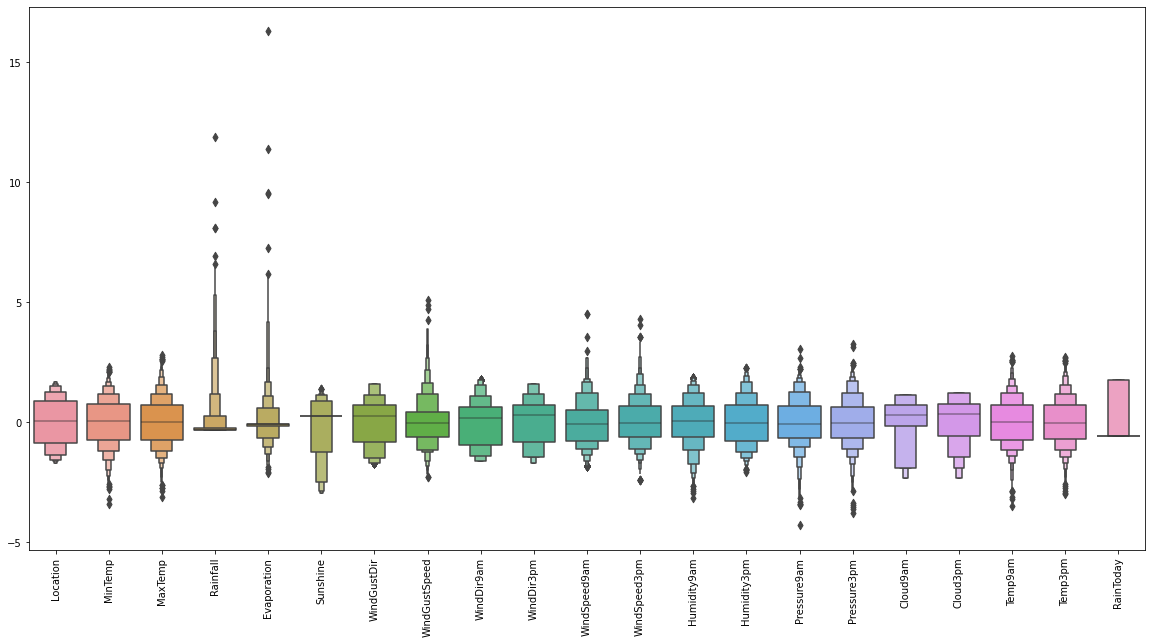

In [449]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

In [450]:
features['RainTomorrow'] = data['RainTomorrow'].values

features = features[(features["MinTemp"]<2)&(features["MinTemp"]>-2)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2.7)]
features = features[(features["Rainfall"]<4.3)]
features = features[(features["Evaporation"]<3)]
features = features[(features["WindGustSpeed"]<2.7)&(features["WindGustSpeed"]>-2)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<3)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Pressure9am"]< 2.5)&(features["Pressure9am"]>-2.9)]
features = features[(features["Pressure3pm"]< 2.3)&(features["Pressure3pm"]>-2.3)]
features = features[(features["Temp9am"]<2)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2)&(features["Temp3pm"]>-2)]

len(features['Location'])

1249

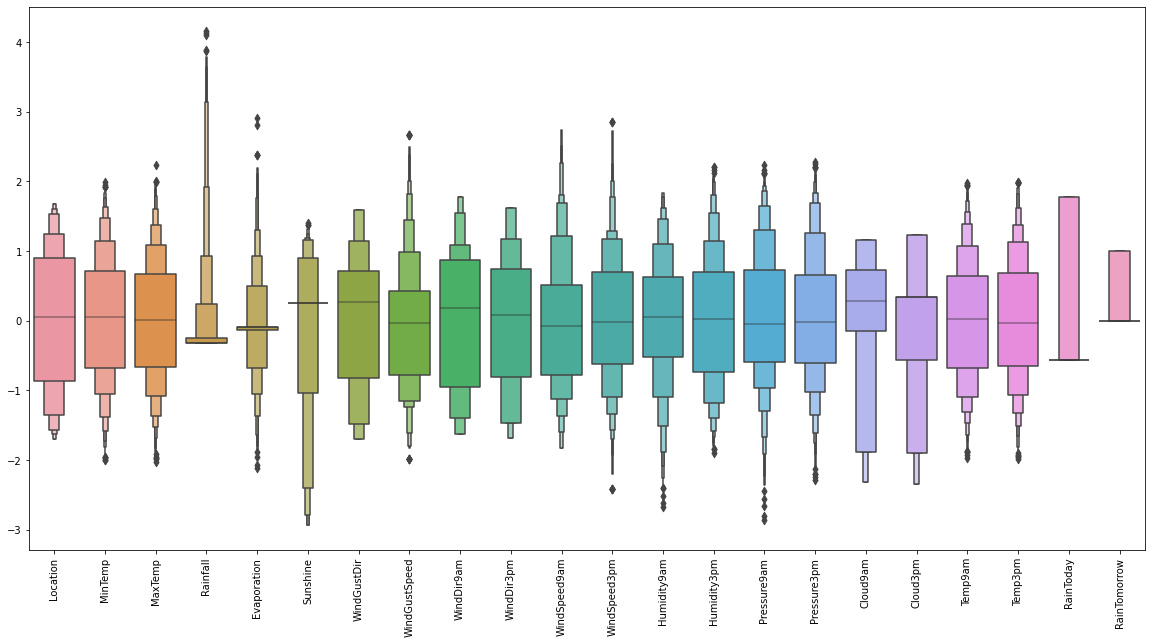

In [451]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

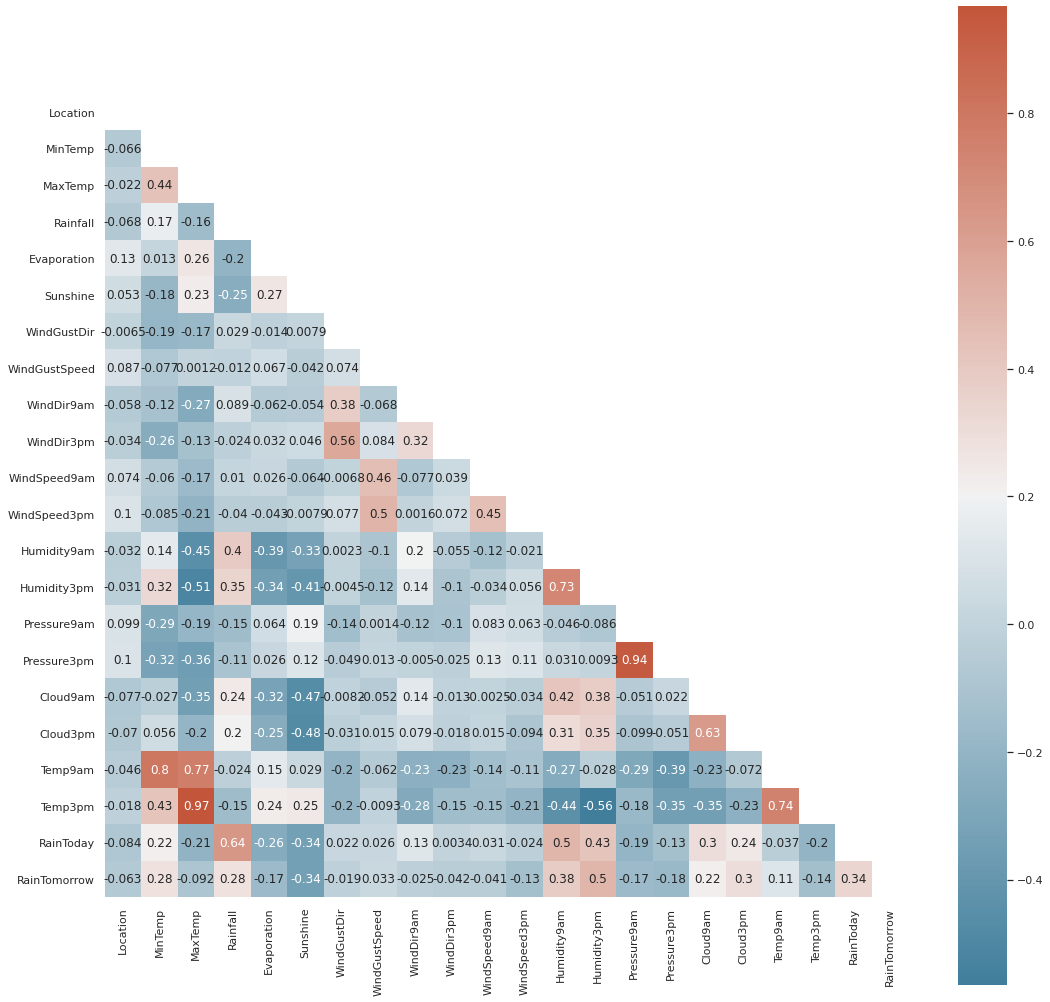

In [458]:
corrmat = features.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, mask=mask, cmap=cmap, annot=True, square=True)

Między tymi parami występuje największa korelacja
- MaxTemp i MinTemp
- Pressure9am i Pressure3pm
- Temp9am i Temp3pm
- MaxTemp i Temp3pm
- Rainfall i RainToday

In [29]:
# sns.pairplot(X)
# plt.show()

# Modele

Tworzymy zbiór testowy i treningowy.

In [565]:
y = features['RainTomorrow']
X = features.drop(['RainTomorrow'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=122)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(749, 21) (749,)
(500, 21) (500,)


In [505]:
X.shape

(1249, 21)

In [506]:
y_train.head()

909     1
457     1
1182    0
123     0
87      0
Name: RainTomorrow, dtype: int64

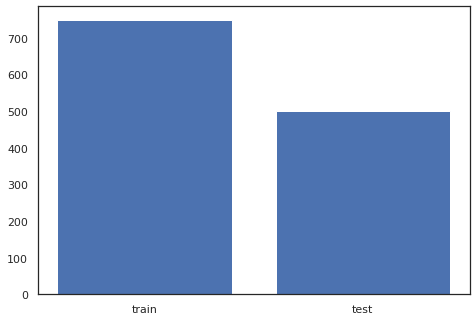

In [566]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lengths = [len(y_train), len(y_test)]
labels = ["train", "test"]
ax.bar(labels,lengths)
plt.show()

In [507]:
kfold = StratifiedKFold(n_splits=5)
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
909,1.034451,1.923403,0.909603,-0.324970,0.341168,-1.285644,0.704829,1.450727,-0.270069,0.293819,...,-0.381314,0.312081,1.894945,-1.426950,-1.392704,0.720874,1.222904,1.601048,-0.522703,-0.563488
457,1.104698,0.178744,0.689507,-0.324970,-0.087011,0.245195,-0.170675,0.613680,-0.270069,1.173146,...,-0.859591,-0.733983,-0.690971,0.771735,0.449897,0.285879,0.331724,0.878709,0.971010,-0.563488
1182,0.472469,0.178744,0.266245,-0.324970,0.501735,1.182442,0.923704,-0.409377,-1.176473,0.733483,...,-0.381314,-0.838590,-0.512632,1.250656,0.967482,-2.324088,-2.341817,0.507779,0.444816,-0.563488
123,-0.019265,0.732930,0.587924,-0.324970,-0.087011,0.245195,0.485953,-0.037357,0.409733,-0.805339,...,-0.142175,0.050565,0.423648,-0.055493,-0.026281,-2.324088,-1.896227,0.820141,0.631530,-0.563488
87,-1.002732,-0.293340,0.503271,-0.324970,0.983436,0.245195,0.923704,-0.037357,0.183132,0.953314,...,0.216533,-1.518531,-1.627251,-0.686799,-0.916526,-1.889094,-1.896227,-0.292651,0.614556,-0.563488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,0.331974,-0.909102,1.400587,-0.324970,-0.087011,1.182442,1.580332,0.241659,-1.403074,1.612809,...,1.292657,-2.303079,-1.493497,-0.817414,-0.875119,-2.324088,-2.341817,1.210595,1.412335,-0.563488
199,0.191478,0.753455,-0.326322,-0.268292,-0.622234,0.338919,1.361456,-0.223367,-0.043468,1.173146,...,-0.022606,1.148932,1.137004,-0.294954,-0.150501,-0.584110,-1.005047,0.449211,-0.200197,-0.563488
1006,0.261726,-1.360660,-1.155916,-0.324970,0.207362,0.245195,0.923704,0.241659,1.769338,0.953314,...,0.933949,-1.047802,-0.913895,0.075122,0.656931,-0.584110,0.331724,-1.210216,-1.116794,-0.563488
951,-0.159760,-1.381186,0.130801,-0.324970,-0.461667,0.026503,0.485953,-0.223367,0.183132,-1.245002,...,-0.620452,0.521293,-0.735556,0.837042,0.470601,1.155869,-0.559456,-1.014989,0.088361,-0.563488


### RandomForest

In [620]:
pipeline_1 = Pipeline([('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_1 = {
            
            'classifier__max_depth' : [1,2,8,16],
            'classifier__n_estimators' : [1, 3, 5, 10, 50],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_


{'classifier__max_depth': 8,
 'classifier__max_leaf_nodes': 32,
 'classifier__n_estimators': 50}

In [621]:
metrics.precision_score(y_test, grid_1.predict(X_test))

0.8472222222222222

### Logistic Regression

In [516]:
pipeline_2 = Pipeline([('classifier', LogisticRegression(n_jobs=-1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True) 
grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 10}

In [517]:
metrics.precision_score(y_test, grid_2.predict(X_test))

0.6829268292682927

### LinearSVC

In [616]:
pipeline_3 = Pipeline([('classifier', LinearSVC(C=1))])

param_grid_3 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 100]
}

grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

/home/mateusz/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mateusz/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mateusz/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mateusz/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mateusz/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, inc

{'classifier__C': 0.01}

In [617]:
metrics.precision_score(y_test, grid_3.predict(X_test))

0.7848101265822784

### KNeighborsClassifier

In [614]:
pipeline_4 = Pipeline([('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid_4 = {
            'classifier__p': [1, 5, 7, 10, 15, 25, 100, 1000, 10000]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__p': 7}

In [615]:
metrics.precision_score(y_test, grid_4.predict(X_test))

0.6233766233766234

### DecisionTreeClassifier

In [608]:
pipeline_5 = Pipeline([('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'classifier__max_depth': [1, 5, 10, 20, 50],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100, 200],
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 1, 'classifier__max_leaf_nodes': None}

In [609]:
metrics.precision_score(y_test, grid_5.predict(X_test))

0.7611940298507462

### BaggingClassifier

In [606]:
pipeline_6 = Pipeline([('classifier', BaggingClassifier())])

param_grid_6 = {
            'classifier__max_samples' : [0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.4, 0.5, 0.7, 1, 2]
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_samples': 0.1}

In [607]:
metrics.precision_score(y_test, grid_6.predict(X_test))

0.7837837837837838

### ExtraTreesClassifier

In [526]:
pipeline_7 = Pipeline([('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_7 = {
            'classifier__n_estimators' : [5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 100}

In [527]:
metrics.precision_score(y_test, grid_7.predict(X_test))

0.735632183908046

### AdaBoostClassifier

In [602]:
pipeline_8 = Pipeline([('classifier', AdaBoostClassifier())])

param_grid_8 = {
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}

In [603]:
metrics.precision_score(y_test, grid_8.predict(X_test))

0.828125

### GradientBoostingClassifier

In [533]:
pipeline_9 = Pipeline([('classifier', GradientBoostingClassifier())])

param_grid_9 = {
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}

In [534]:
metrics.precision_score(y_test, grid_9.predict(X_test))

0.7387387387387387

### MLPClassifier

In [599]:
pipeline_10 = Pipeline([('classifier', MLPClassifier())])

param_grid_10 = {
            'classifier__hidden_layer_sizes': [(30,30,30)],
            'classifier__learning_rate_init': [0.01, 0.1],
            'classifier__max_iter': [500,1000,10000],
            'classifier__batch_size':[10, 20, 30, 40],
}

grid_10 = GridSearchCV(pipeline_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__batch_size': 10,
 'classifier__hidden_layer_sizes': (30, 30, 30),
 'classifier__learning_rate_init': 0.01,
 'classifier__max_iter': 1000}

In [601]:
metrics.precision_score(y_test, grid_10.predict(X_test))

0.6428571428571429

## Porównanie modeli

In [622]:
models = []
models.append(('Random Forest', grid_1.best_estimator_))
models.append(('Logistic Regression', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('K Neighbors Classifier', grid_4.best_estimator_))
models.append(('Decision Tree Classifier', grid_5.best_estimator_))
models.append(('Bagging Classifier', grid_6.best_estimator_))
models.append(('Extra Trees Classifier', grid_7.best_estimator_))
models.append(('Ada Boost Classifier', grid_8.best_estimator_))
models.append(('Gradient Boosting Classifier', grid_9.best_estimator_))
models.append(('MLP Classifier', grid_10.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
        
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Random Forest', 'Logistic Regression', 'SVM linear', 'K Neighbors Classifier', 'Decision Tree Classifier', 'Bagging Classifier', 'Extra Trees Classifier', 
                                         'Ada Boost Classifier', 'Gradient Boosting Classifier', 'MLP Classifier'])
df.sort_values(by=['precision_score'], ascending=False)

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,Random Forest,0.847222,0.525862,0.648936,0.868,0.873765
7,Ada Boost Classifier,0.828125,0.456897,0.588889,0.852,0.869567
2,SVM linear,0.784810,0.534483,0.635897,0.858,0.877514
5,Bagging Classifier,0.783784,0.500000,0.610526,0.852,0.801870
6,Extra Trees Classifier,0.781250,0.431034,0.555556,0.840,0.869635
8,Gradient Boosting Classifier,0.779070,0.577586,0.663366,0.864,0.859577
4,Decision Tree Classifier,0.761194,0.439655,0.557377,0.838,0.698994
1,Logistic Regression,0.697917,0.577586,0.632075,0.844,0.861126
9,MLP Classifier,0.642857,0.543103,0.588785,0.824,0.852146
3,K Neighbors Classifier,0.623377,0.413793,0.497409,0.806,0.789871


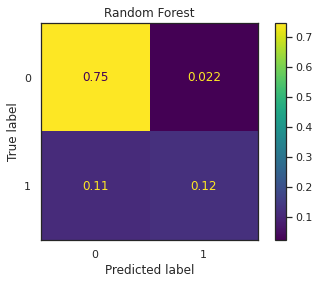

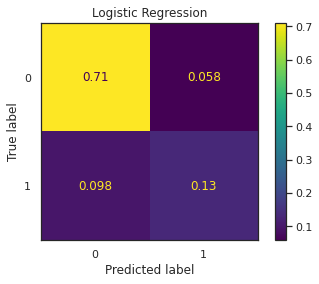

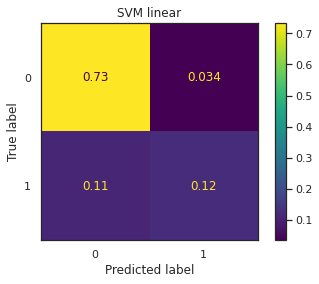

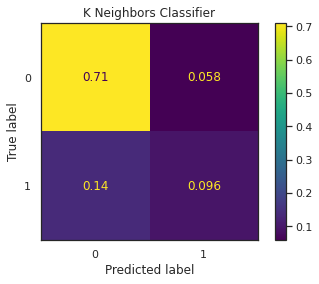

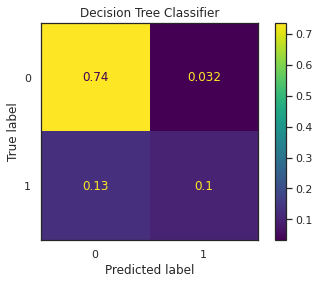

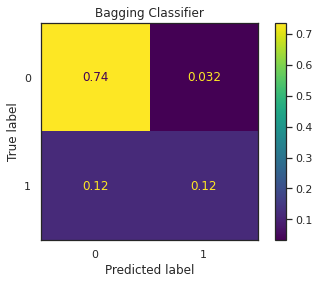

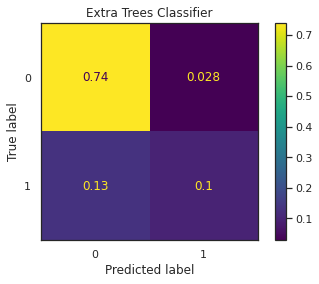

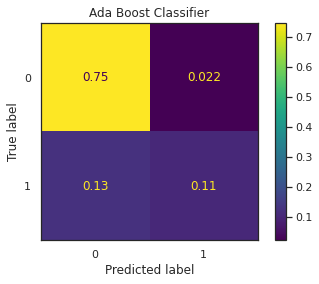

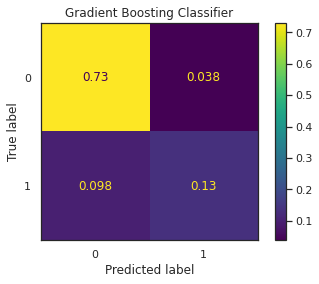

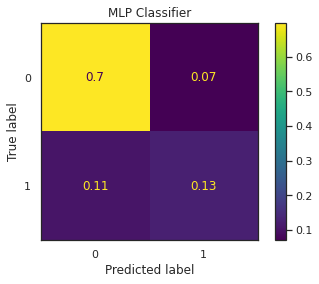

In [623]:
for name, model in models:
    cm = plot_confusion_matrix(model, X_test, y_test, normalize = 'all')
    cm.ax_.set_title(name)

Jak możemy zauważyć zarówno z powyższej tabelki jak i z tablicy pomyłek najlepiej poradziły sobie modele Random Forest oraz Ada Boost.

# Siecie neuronowe

### Early Stopping

In [539]:
history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               2200      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 7,771
Trainable params: 7,771
Non-trainable params: 0
_________________________________________________________________


In [540]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [541]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=40,
    restore_best_weights=True,)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=300, callbacks=[early_stopping])

Epoch 1/300
20/20 [==============================] - 3s 54ms/step - loss: 1.0758 - accuracy: 0.2321 - val_loss: 0.7691 - val_accuracy: 0.2304
Epoch 2/300
20/20 [==============================] - 0s 10ms/step - loss: 0.7204 - accuracy: 0.3650 - val_loss: 0.6286 - val_accuracy: 0.7696
Epoch 3/300
20/20 [==============================] - 0s 12ms/step - loss: 0.6073 - accuracy: 0.7949 - val_loss: 0.5831 - val_accuracy: 0.7696
Epoch 4/300
20/20 [==============================] - 0s 11ms/step - loss: 0.5606 - accuracy: 0.8007 - val_loss: 0.5623 - val_accuracy: 0.7696
Epoch 5/300
20/20 [==============================] - 0s 11ms/step - loss: 0.5475 - accuracy: 0.7859 - val_loss: 0.5513 - val_accuracy: 0.7696
Epoch 6/300
20/20 [==============================] - 0s 11ms/step - loss: 0.5497 - accuracy: 0.7674 - val_loss: 0.5443 - val_accuracy: 0.7696
Epoch 7/300
20/20 [==============================] - 0s 10ms/step - loss: 0.5584 - accuracy: 0.7497 - val_loss: 0.5387 - val_accuracy: 0.7696
Epoch 

20/20 [==============================] - 0s 7ms/step - loss: 0.2313 - accuracy: 0.9157 - val_loss: 0.3741 - val_accuracy: 0.8544
Epoch 116/300
20/20 [==============================] - 0s 8ms/step - loss: 0.2120 - accuracy: 0.9171 - val_loss: 0.3768 - val_accuracy: 0.8464
Epoch 117/300
20/20 [==============================] - 0s 9ms/step - loss: 0.2302 - accuracy: 0.9114 - val_loss: 0.3766 - val_accuracy: 0.8496
Epoch 118/300
20/20 [==============================] - 0s 9ms/step - loss: 0.2155 - accuracy: 0.9132 - val_loss: 0.3782 - val_accuracy: 0.8400
Epoch 119/300
20/20 [==============================] - 0s 9ms/step - loss: 0.2471 - accuracy: 0.9072 - val_loss: 0.3767 - val_accuracy: 0.8624
Epoch 120/300
20/20 [==============================] - 0s 9ms/step - loss: 0.2215 - accuracy: 0.9170 - val_loss: 0.3771 - val_accuracy: 0.8592
Epoch 121/300
20/20 [==============================] - 0s 13ms/step - loss: 0.2172 - accuracy: 0.9135 - val_loss: 0.3876 - val_accuracy: 0.8384
Epoch 122/30

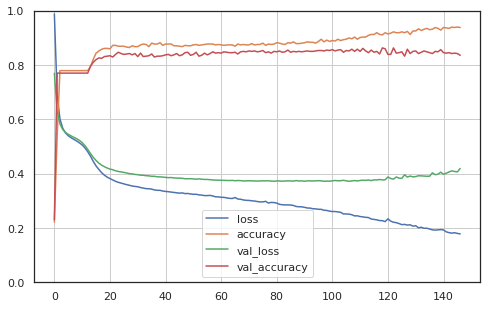

In [542]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [543]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8512


[0.3714609742164612, 0.8511999845504761]

<AxesSubplot:>

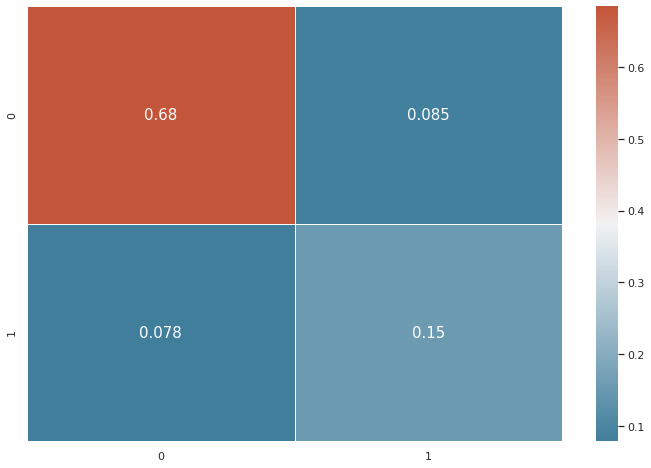

In [563]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, linewidths=0.5, annot = True, annot_kws = {'size':15})

# Podsumowanie

Dzięki użytym modelom jesteśmy w stanie przewidzieć czy następnego dnia będzie padał deszcz z prawdopodobieństwem około 80%.